# Polycubes



1	monocube	1	1

2	dicube	1	1

3	tricubes	2	2

4	tetracubes	8	5

5	pentacubes	29	12

6	hexacubes	166	35


Visualization code:

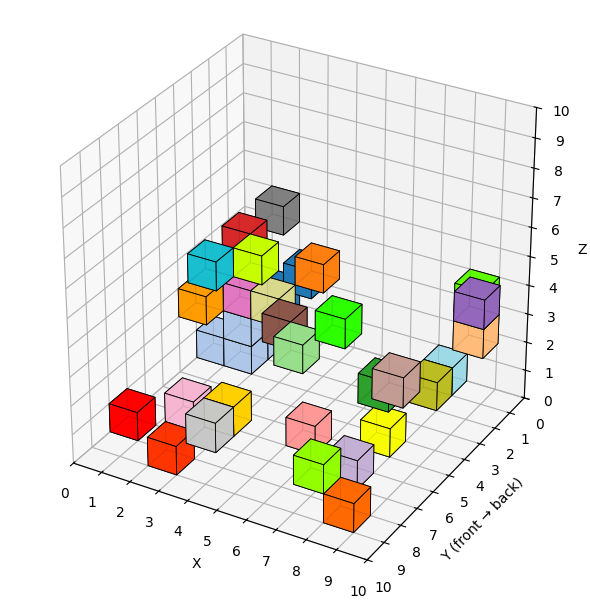

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def make_cube_at(position, size=1.0):
    x, y, z = position
    v = np.array([[x, y, z],
                  [x + size, y, z],
                  [x + size, y + size, z],
                  [x, y + size, z],
                  [x, y, z + size],
                  [x + size, y, z + size],
                  [x + size, y + size, z + size],
                  [x, y + size, z + size]])
    faces = [
        [v[0], v[1], v[2], v[3]],  # bottom
        [v[4], v[5], v[6], v[7]],  # top
        [v[0], v[1], v[5], v[4]],  # front
        [v[2], v[3], v[7], v[6]],  # back
        [v[1], v[2], v[6], v[5]],  # right
        [v[0], v[3], v[7], v[4]]   # left
    ]
    return faces

def generate_colors(n_groups):
    """
    Return at least 30 visually distinct RGBA colors.
    Uses tab20 for first 20 then HSV evenly spaced.
    """
    if n_groups <= 20:
        cmap = plt.get_cmap('tab20', 20)
        return cmap(range(n_groups))
    else:
        # Combine tab20 and hsv to reach required count
        colors = list(plt.get_cmap('tab20', 20)(range(20)))
        hsv_needed = n_groups - 20
        hsv_colors = plt.get_cmap('hsv', max(hsv_needed, 30))(range(hsv_needed))
        colors.extend(hsv_colors)
        return colors[:n_groups]

def plot_cube_groups(groups, size=1.0, invert_y=True):
    """
    groups : list(list(tuple))
        Outer list defines color‑groups; all cubes in inner list share one color.
    """
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # prepare colors
    n_groups = len(groups)
    colors = generate_colors(max(n_groups, 30))  # ensure at least 30 unique base colors

    # draw each group
    for g_idx, group in enumerate(groups):
        color = colors[g_idx]
        for pos in group:
            ax.add_collection3d(
                Poly3DCollection(make_cube_at(pos, size),
                                 facecolors=color, edgecolors='k',
                                 linewidths=0.6, alpha=0.9)
            )

    # ---- axis limits ----
    all_pts = np.array([coord for group in groups for coord in group])
    upper = np.ceil((all_pts + size).max())
    ax.set_xlim(0, upper)
    ax.set_zlim(0, upper)
    if invert_y:
        ax.set_ylim(upper, 0)
    else:
        ax.set_ylim(0, upper)

    ticks = np.arange(0, upper + 1, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)

    ax.set_box_aspect([1, 1, 1])

    ax.set_xlabel("X")
    ax.set_ylabel("Y (front → back)" if invert_y else "Y")
    ax.set_zlabel("Z")
    plt.tight_layout()
    return fig, ax

# plt.register_cmap(name='my_colormap', cmap=my_colormap) # 
# ----- demo -----
groups_demo = [
    [(0, 0, 0), (1, 0, 1), (2, 0, 2)],        # group 1
    [(0, 2, 0), (1, 2, 1), (1,1,0), (1,2,0)],                   # group 2
    [(3, 1, 3)],                              # group 3
    *[[ (np.random.randint(0, 10), np.random.randint(0, 10), 
         np.random.randint(0, 5)) ] for _ in range(27)]  # make 30 groups total
]

fig, ax = plot_cube_groups(groups_demo, size=1.0, invert_y=True)
plt.show()
